## Import some libraries

In [28]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


## Utility function to read images

In [29]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## See original frame

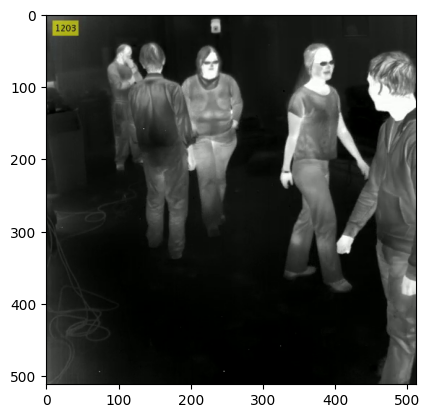

In [30]:
image = read_image(os.path.join("data", "original.png"))
plt.imshow(image)

## See the original image in HOT colormap

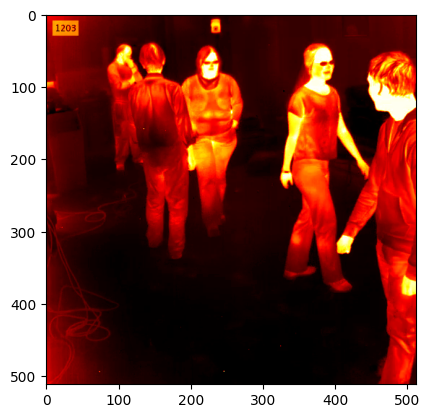

In [31]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)

## Do binary threshold

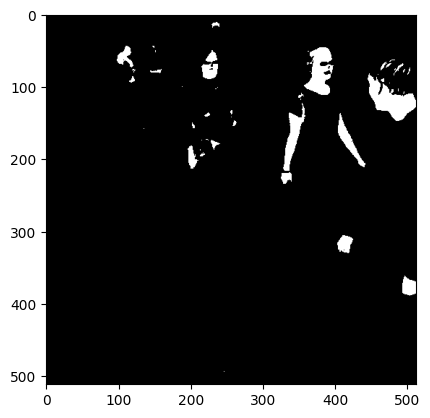

In [32]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

## Opening operation. i.e. Erosion followed by Dilation to enhance images for thermal detection

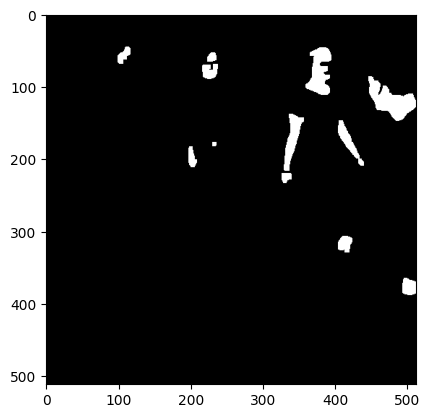

In [33]:
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)
plt.imshow(image_opening, cmap='gray')

## Combining original gray image and heatmap image to compare images

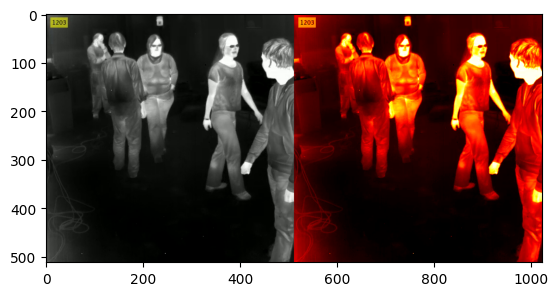

In [34]:
stacked = np.hstack((image, heatmap))
plt.imshow(stacked)